In [8]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from sqlalchemy import create_engine, types
from sqlalchemy import text 

In [9]:
df_1 = pd.read_csv('../data/Cleaned/cleaned_world_marriage.csv')
df_2 = pd.read_csv('../data/Cleaned/cleaned_age_at_marriage_women.csv')
df_3 = pd.read_csv('../data/Cleaned/cleaned_marriage-rate-per-1000-inhabitants.csv')
df_4 = pd.read_csv('../data/Cleaned/cleaned_marriage-rates-in-1990-vs-2020.csv')
df_5 = pd.read_csv('../data/Cleaned/cleaned_share-of-births-outside-marriage.csv')
df_6 = pd.read_csv('../data/Cleaned/cleaned_share-of-men-in-england-and-wales-who-have-ever-married-by-age.csv')
df_7 = pd.read_csv('../data/Cleaned/cleaned_share-of-single-parent-households.csv')
df_8 = pd.read_csv('../data/Cleaned/cleaned_share-of-women-in-england-and-wales-who-have-ever-married-by-age.csv')
df_9 = pd.read_csv('../data/Cleaned/cleaned_unpopulation_dataportal.csv')
df_10 = pd.read_csv('../data/processed/countries.csv',  header=5, low_memory=False)

In [15]:
print(df_1.info())
print(df_1.describe())
print(df_1.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271417 entries, 0 to 271416
Data columns (total 8 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   country                     271417 non-null  object
 1   age_group                   271417 non-null  object
 2   sex                         271417 non-null  object
 3   marital_status              271417 non-null  object
 4   data_process                271417 non-null  object
 5   data_collection_start_year  271417 non-null  int64 
 6   data_collection_end_year    271417 non-null  int64 
 7   data_source                 271417 non-null  object
dtypes: int64(2), object(6)
memory usage: 16.6+ MB
None
       data_collection_start_year  data_collection_end_year
count               271417.000000             271417.000000
mean                  1996.953956               1997.051633
std                     14.246312                 14.285932
min                   19

<Figure size 1200x800 with 0 Axes>

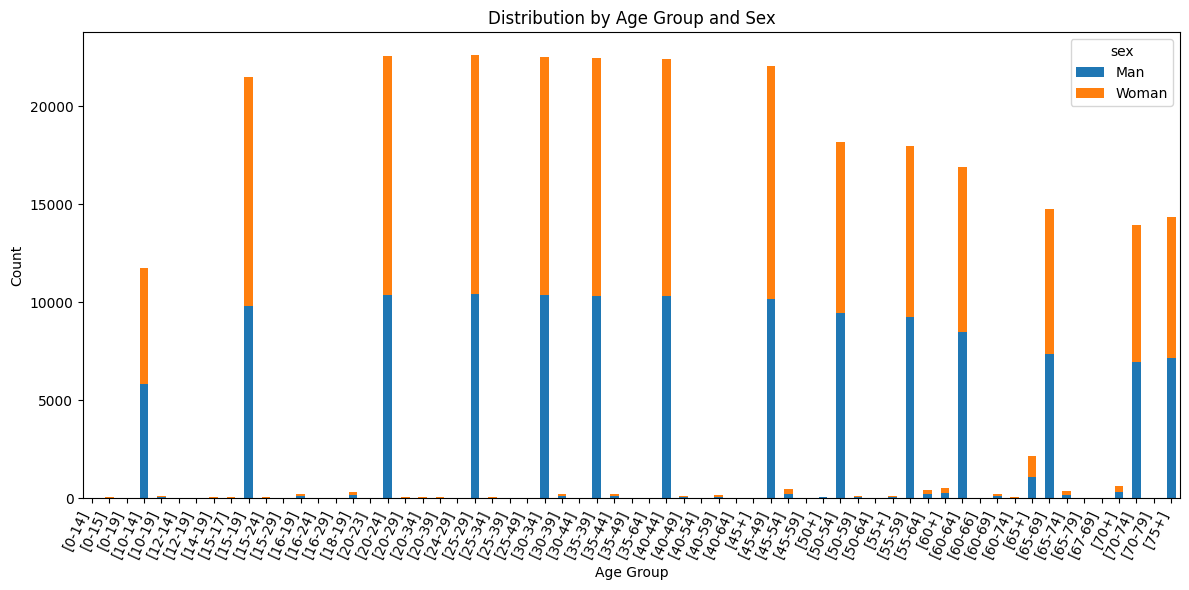

In [28]:
plt.figure(figsize=(12,8))
age_sex_counts = df_1.groupby(['age_group', 'sex']).size().unstack()
age_sex_counts.plot(kind='bar', stacked=True, figsize=(12,6))
plt.title('Distribution by Age Group and Sex')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=65, ha='right')
plt.tight_layout()
plt.show()

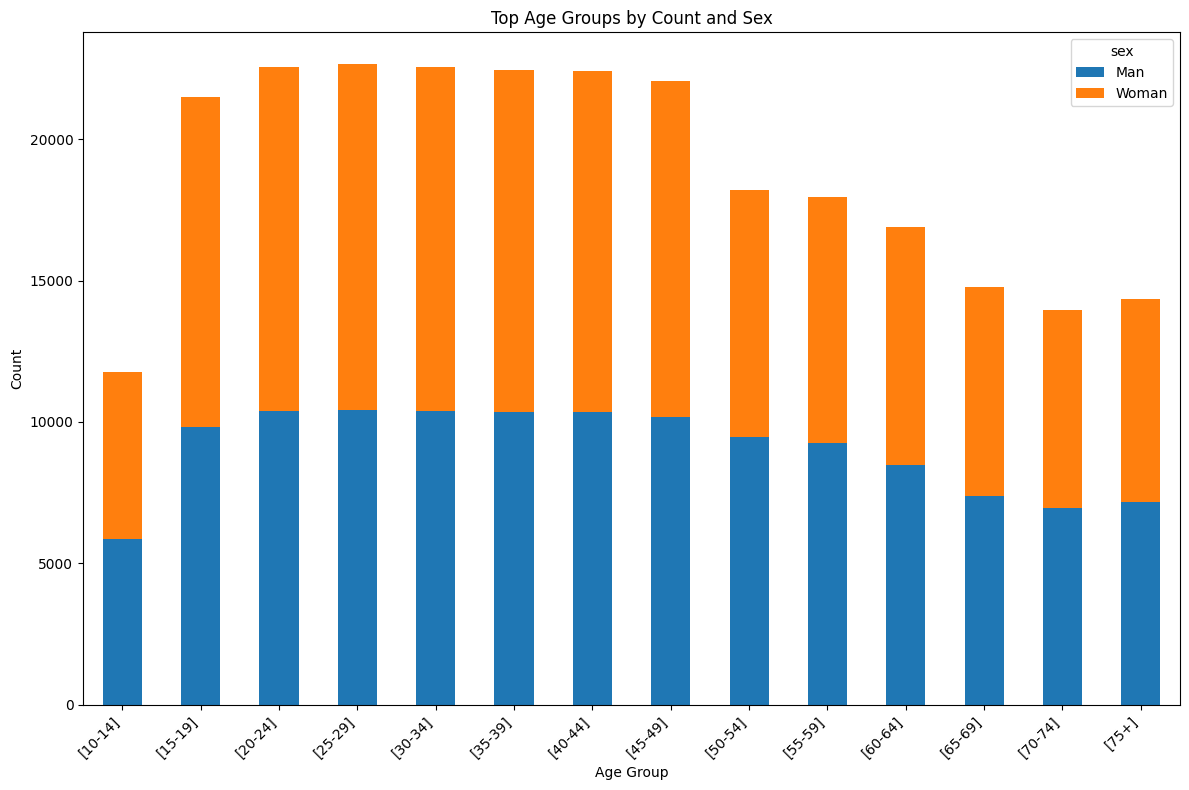

In [27]:
top_age_groups = df_1['age_group'].value_counts().nlargest(14).index
age_sex_counts_top = df_1[df_1['age_group'].isin(top_age_groups)].groupby(['age_group', 'sex']).size().unstack()
age_sex_counts_top.plot(kind='bar', stacked=True, figsize=(12,8))
plt.title('Top Age Groups by Count and Sex')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

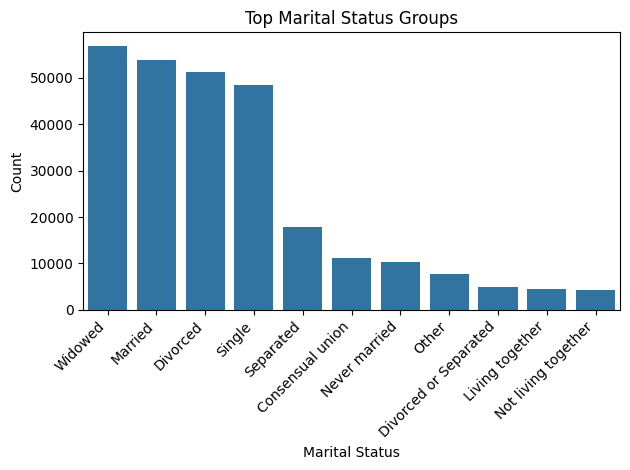

In [22]:
marital_counts = df_1['marital_status'].value_counts()
top_n = 10
top_categories = marital_counts.index[:top_n]
df_1['marital_status_grouped'] = df_1['marital_status'].apply(lambda x: x if x in top_categories else 'Other')

grouped_counts = df_1['marital_status_grouped'].value_counts()
sns.barplot(x=grouped_counts.index, y=grouped_counts.values)
plt.title('Top Marital Status Groups')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

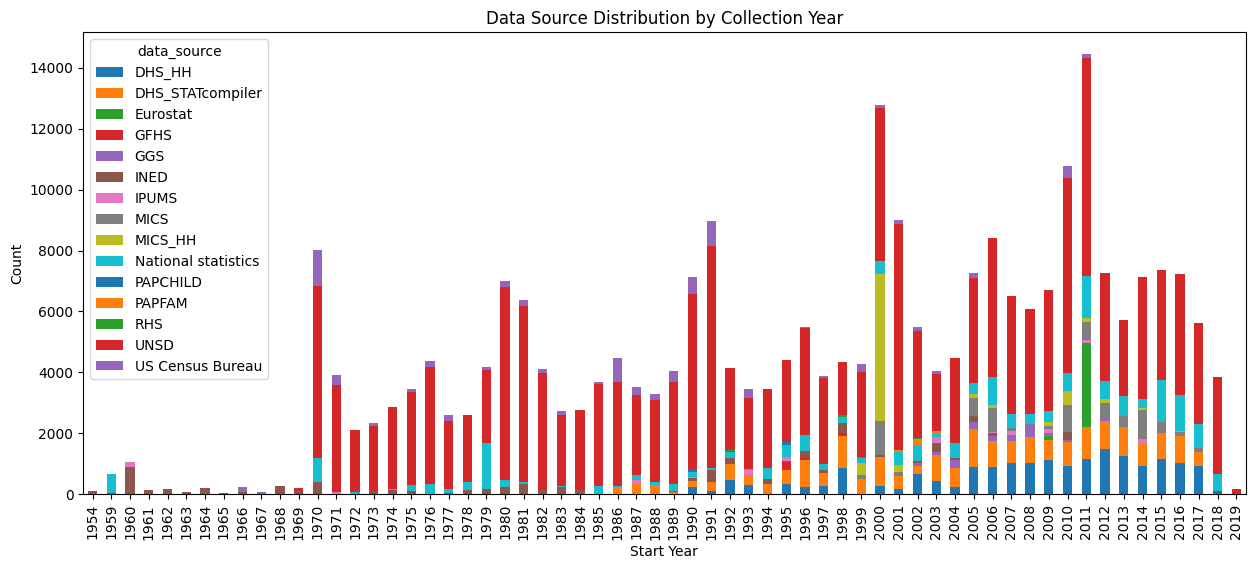

In [18]:
source_year_counts = df_1.groupby(['data_collection_start_year', 'data_source']).size().unstack(fill_value=0)
source_year_counts.plot(kind='bar', stacked=True, figsize=(15,6))
plt.title('Data Source Distribution by Collection Year')
plt.xlabel('Start Year')
plt.ylabel('Count')
plt.show()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1047 entries, 0 to 1046
Data columns (total 4 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country                              1047 non-null   object 
 1   code                                 1047 non-null   object 
 2   year                                 1047 non-null   int64  
 3   mean_age_of_women_at_first_marriage  1047 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 32.8+ KB
None
              year  mean_age_of_women_at_first_marriage
count  1047.000000                          1047.000000
mean   2005.023878                            27.683043
std       8.689371                             2.532542
min    1990.000000                            20.000000
25%    1998.000000                            25.900000
50%    2005.000000                            27.700000
75%    2012.000000                    

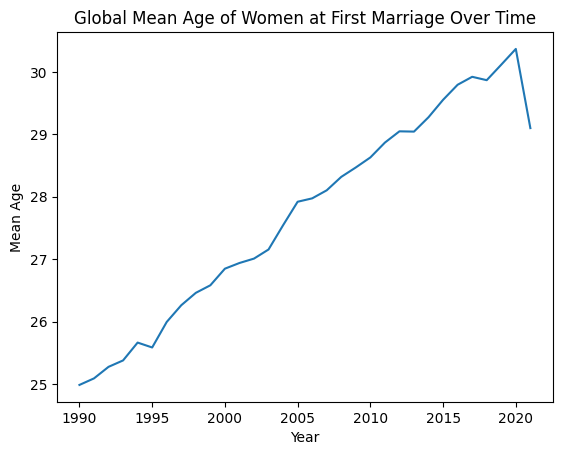

In [11]:
# EDA & Visualization
print(df_2.info())
print(df_2.describe())
print(df_2.head())

# Global mean age over time
yearly_age = df_2.groupby('year')['mean_age_of_women_at_first_marriage'].mean().reset_index()
sns.lineplot(data=yearly_age, x='year', y='mean_age_of_women_at_first_marriage')
plt.title('Global Mean Age of Women at First Marriage Over Time')
plt.xlabel('Year')
plt.ylabel('Mean Age')
plt.show()